In [409]:

# Create figures in Python that handle LaTeX, and save images to files in my
# preferred formatting. I typically place this code in the root of each of my
# projects, and import using:
# from latexify import *
# which will also run the latexify() function on the import.

# Based on code from https://nipunbatra.github.io/blog/2014/latexify.html

import matplotlib
import matplotlib.pyplot as plt
from math import sqrt

#Back-end to use depends on the system
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
# matplotlib.use('pgf')
# from matplotlib.backends.backend_pgf import FigureCanvasPgf
# matplotlib.backend_bases.register_backend('ps', FigureCanvasPgf)

import seaborn as sns
sns.set_style("white")

#my preferred palette. From
#https://seaborn.pydata.org/tutorial/color_palettes.html: "The cubehelix color
#palette system makes sequential palettes with a linear increase or decrease in
#brightness and some variation in hue. This means that the information in your
#colormap will be preserved when converted to black and white (for printing) or
#when viewed by a colorblind individual."

# I typically set the number of colors (below, 8) to the distinct colors I need
# in a given plot, so as to use the full range.
sns.set_palette(sns.color_palette("cubehelix", 8))


# The following is the latexify function. It allows you to create 2 column or 1
# column figures. You may also wish to alter the height or width of the figure.
# The default settings are good for most cases. You may also change the
# parameters such as labelsize and fontsize based on your classfile.
def latexify(fig_width=None, fig_height=None, columns=1, ticksize=8):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.
    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1, 2])

    if fig_width is None:
        fig_width = 6.9 if columns == 1 else 13.8  # width in inches #3.39

    if fig_height is None:
        golden_mean = (sqrt(5) - 1.0) / 2.0    # Aesthetic ratio
        fig_height = fig_width * golden_mean  # height in inches

    MAX_HEIGHT_INCHES = 16.0
    if fig_height > MAX_HEIGHT_INCHES:
        print(("WARNING: fig_height too large:" + fig_height +
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches."))
        fig_height = MAX_HEIGHT_INCHES

    params = {
            # 'backend': 'ps',
           #   'pgf.rcfonts': False,
           #   'pgf.preamble': ['\\usepackage{gensymb}', '\\usepackage[dvipsnames]{xcolor}'],
           #   "pgf.texsystem": "pdflatex",
             # 'text.latex.preamble': ['\\usepackage{gensymb}', '\\usepackage[dvipsnames]{xcolor}'],
              'text.latex.preamble': '\\usepackage{mathptmx}',
              #values below are useful defaults. individual plot fontsizes are
              #modified as necessary.
              'axes.labelsize': 8,  # fontsize for x and y labels
              'axes.titlesize': 8,
              'font.size': 8,
              'legend.fontsize': 8,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize,
              'text.usetex': True,
              'figure.figsize': [fig_width, fig_height],
              'font.family': 'DejaVu Sans',
              'font.serif': 'Times',
               'lines.linewidth': 1.5,
               'lines.markersize':1,
               'xtick.major.pad' : 2,
               'ytick.major.pad' : 2,
                'axes.xmargin' :  .0,  # x margin.  See `axes.Axes.margins`
                'axes.ymargin' : .0,  # y margin See `axes.Axes.margins`
              }

    matplotlib.rcParams.update(params)

def saveimage(name, fig = plt, extension = 'pdf', folder = 'plots/'):
    sns.despine()

    #Minor ticks off by default in matplotlib
    # plt.minorticks_off()

    #grid being off is the default for seaborn white style, so not needed.
    # plt.grid(False, axis = "x")
    # plt.grid(False, axis = "y")
    
    fig.savefig('{}{}.{}'.format(folder,name, extension), bbox_inches = 'tight')

latexify()

In [410]:
import numpy as np
import getdist
from getdist import plots
import corner
import chainconsumer
import os

import imnn
import imnn.lfi
import tensorflow_probability.substrates.jax as tfp

In [411]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes, InsetPosition, mark_inset
from matplotlib.legend_handler import HandlerTuple

In [412]:
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"\usepackage{amsmath}\usepackage{upgreek}"})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 20})

In [413]:
colorsDict = {
              # Match pygtc up to v0.2.4
              'blues_old' : ('#4c72b0','#7fa5e3','#b2d8ff'),
              'greens_old' : ('#55a868','#88db9b','#bbffce'),
              'yellows_old' : ('#f5964f','#ffc982','#fffcb5'),
              'reds_old' : ('#c44e52','#f78185','#ffb4b8'),
              'purples_old' : ('#8172b2','#b4a5e5','#37d8ff'),
              # New color scheme, dark colors match matplotlib v2
              'blues' : ('#1f77b4','#52aae7','#85ddff'),
              'oranges' : ('#ff7f0e','#ffb241','#ffe574'),
              'greens' : ('#2ca02c','#5fd35f','#92ff92'),
              'reds' : ('#d62728','#ff5a5b','#ff8d8e'),
              'purples' : ('#9467bd','#c79af0','#facdff'),
              'browns' : ('#8c564b','#bf897e','#f2bcb1'),
              'pinks' : ('#e377c2','#ffaaf5','#ffddff'),
              'grays' : ('#7f7f7f','#b2b2b2','#e5e5e5'),
              'yellows' : ('#bcbd22','#eff055','#ffff88'),
              'cyans' : ('#17becf','#4af1ff','#7dffff'),
          }
defaultColorsOrder = ['blues', 'oranges','greens', 'reds', 'purples',
                    'browns', 'pinks', 'grays', 'yellows', 'cyans']
colorsOrder = defaultColorsOrder
colors = [colorsDict[cs] for cs in colorsOrder]

In [36]:
num_fields = 4
N = 20
n_levels = 2

alphamin = 0.
alphamax = 2.0

betamin = 0.2
betamax = 0.8

nalpha       = 80
nbeta        = nalpha

In [11]:
# set directories
outdir = './plots/'
datadir = './LN-data/'
marg_dirs = ['/Users/lucas/Datasets/imnn-ln-delfi/posteriors_field_%d_90_45/'%(i+1) for i in range(num_fields)]

In [351]:
# load in field data
field_data = [np.load(datadir + 'toy_LN_field_90_45_%d.npy'%(i+1)) for i in range(num_fields)]

# load in all marginals

# for BHM
BHM_posts = [np.load(marg_dirs[i] + 'post_chains_bhm.npy') for i in range(num_fields)]

# for all MAFs 
MAF_posts = [np.load(marg_dirs[i] + 'post_chains_maf_super.npy') for i in range(num_fields)]
#MAF_posts[2] = np.load('/Users/lucas/Datasets/imnn-ln-delfi/posteriors_field_3_90_45_new/' + 'post_chains_maf_super.npy')

# pull in fisher at target
fisher_analytic = np.load(marg_dirs[1] + 'fisher_analytic.npy')

# pull in MAF training histories
train_losses_all = [np.load(marg_dirs[i] + 'maf_train_losses.npy') for i in range(num_fields)]
val_losses_all = [np.load(marg_dirs[i] + 'maf_val_losses.npy') for i in range(num_fields)]

In [ ]:
def triangle_plot(samples = None, weights = None, truths = None, 
                  savefig = False, filename = None, names = None, labels = None, 
                  ranges = None, fontsize = 14, legend_labels=None):
    # Set samples to the posterior samples by default
    if weights is None:
        mc_samples = [MCSamples(samples=samples[i], weights=None, names=names, labels=labels, ranges=ranges) for i in range(len(samples))]
    else:
        mc_samples = [MCSamples(samples=samples[i], weights=weights[i], names=names, labels=labels, ranges=ranges) for i in range(len(samples))]
    # Triangle plot
    plt.close()
    with mpl.rc_context():
        g = plots.getSubplotPlotter(width_inch = 12)
        g.settings.figure_legend_frame = False
        g.settings.alpha_filled_add=0.6
        g.settings.axes_fontsize=fontsize
        g.settings.legend_fontsize=fontsize
        g.settings.lab_fontsize=fontsize
        g.triangle_plot(mc_samples, filled_compare=True, normalized=True, legend_labels=legend_labels)
        for i in range(0, len(samples[0][0,:])):
            for j in range(0, i+1):
                ax = g.subplots[i,j]
                #xtl = ax.get_xticklabels()
                #ax.set_xticklabels(xtl, rotation=45)
        if truths is not None:
            for column in range(0, len(samples[0][0,:])-1):
                for row in range(column+1, len(samples[0][0,:])): 
                    ax = g.subplots[row,column]
                    for t in range(len(truths)):
                        ax.scatter(np.array([truths[t][column]]), np.array([truths[t][row]]), marker = 'x', color = 'black')
        #plt.tight_layout()
        plt.subplots_adjust(hspace=0, wspace=0)
        if savefig:
            plt.savefig(filename)
            plt.show()
        else:
            plt.show()
        plt.close()

In [43]:
alphas=np.linspace(alphamin,alphamax,nalpha)
betas=np.linspace(betamin,betamax,nbeta)

In [27]:
levs = getdist.densities.getContourLevels(MAF_posts[0])

Removed no burn in
Removed no burn in


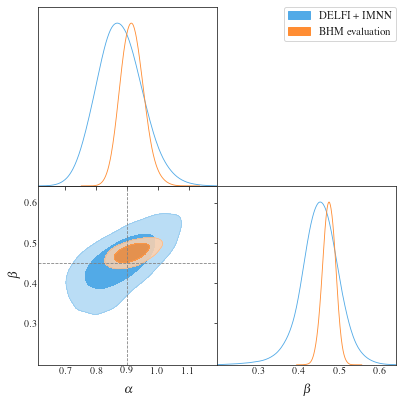

In [78]:
dataid = 0
colors = ['#52aae7', '#FF8D33']
legend_labels = ['DELFI + IMNN', 'BHM evaluation']

bhm_mcsamples = getdist.MCSamples(samples=np.array(BHM_posts[dataid]), 
                            names=['alpha', 'beta'], 
                            labels=['\\alpha', '\\beta'])

delfi_mcsamples = getdist.MCSamples(samples=np.array(MAF_posts[dataid]), 
                            names=['alpha', 'beta'], 
                            labels=['\\alpha', '\\beta'])

mcsamples = [delfi_mcsamples, bhm_mcsamples]

#fig,ax = plt.subplots(ncols=2, nrows=2)

g = plots.get_subplot_plotter(subplot_size=3)

g.triangle_plot(mcsamples, filled=True, legend_labels=legend_labels,
                contour_colors=colors)

# plot_contours(-analytic_F_target, ax=g.subplots[1,0], pos=np.array([target["α"], target["β"]]), 
#           set_lims=False, color='k', alpha=0.7)

#patch1 = mpatches.Patch(color='k', alpha=0.7, label='Anaytic Fisher at target')
#plt.legend(handles=[patch1], bbox_to_anchor=(0.627, 0.03))

g.subplots[1,0].axhline(θ_target[1], color='gray', linestyle='--', lw=0.8)
g.subplots[1,0].axvline(θ_target[0], color='gray', linestyle='--', lw=0.8)

In [271]:
Finv_IMNN

array([[0.00440038, 0.00137853],
       [0.00137853, 0.00131341]])

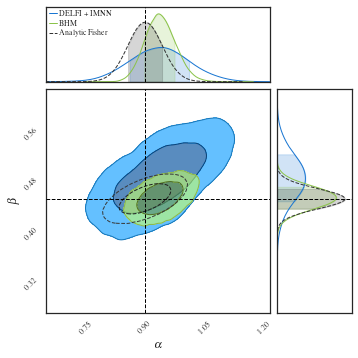

In [338]:
θ_target = np.array([0.9, 0.45])
params = [r"$\alpha$", r"$\beta$"]
corner_colors = [None, None, 'k']

Finv_analytic = (-np.linalg.inv(fisher_analytic))

dataid = 3

c = ChainConsumer()
# c.configure(color_params="$z$")
c.add_chain(MAF_posts[dataid], parameters=params, name='DELFI + IMNN', color=corner_colors[0])
c.add_chain(BHM_posts[dataid], parameters=params, name='BHM', color=corner_colors[1])
c.add_covariance(θ_target, -Finv_analytic, parameters=params, name="Analytic Fisher", color=corner_colors[2])
c.configure(linestyles=["-", "-", "--"], linewidths=[1.0, 1.0, 1.0,],
            shade=[True, True, False], shade_alpha=[0.7, 0.6, 0.],
            tick_font_size=8,
           legend_kwargs={"loc": "upper left", "fontsize": 8},
            legend_color_text=False, legend_location=(0, 0))

fig = c.plotter.plot(figsize="column", truth=[0.90, 0.45], filename=outdir + 'field_%d_inference_comp'%(dataid + 1))

/Users/lucas/anaconda3/envs/pyimnn/lib/python3.7/site-packages/chainconsumer/chainconsumer.py:346: RuntimeWarning: covariance is not positive-semidefinite.
  chain = np.random.multivariate_normal(mean, covariance, size=1000000)


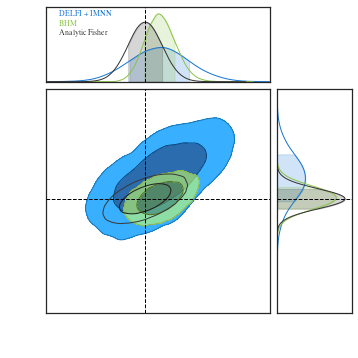

In [976]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

θ_target = np.array([0.9, 0.45])
params = [r"$\alpha$", r"$\beta$"]
corner_colors = [None, None, 'k']

Finv_analytic = (-np.linalg.inv(fisher_analytic))

dataid = 3

c = ChainConsumer()
# c.configure(color_params="$z$")
c.add_chain(MAF_posts[dataid], parameters=params, name='DELFI + IMNN', color=corner_colors[0])
c.add_chain(BHM_posts[dataid], parameters=params, name='BHM', color=corner_colors[1])
c.add_covariance(θ_target, -Finv_analytic, parameters=params, name="Analytic Fisher", color=corner_colors[2])
c.configure(linestyles=["-", "-", "-"], linewidths=[1.0, 1.0, 1.0,],
            shade=[True, True, False], shade_alpha=[0.9, 0.6, 0.],
            tick_font_size=8,
           legend_kwargs={"loc": "upper left", "fontsize": 8},
            legend_color_text=True, legend_location=(0, 0))

fig = c.plotter.plot(figsize="column", truth=[0.90, 0.45], filename=outdir + 'white_field_%d_inference_comp'%(dataid + 1))

/Users/lucas/anaconda3/envs/pyimnn/lib/python3.7/site-packages/chainconsumer/chainconsumer.py:346: RuntimeWarning: covariance is not positive-semidefinite.
  chain = np.random.multivariate_normal(mean, covariance, size=1000000)
/Users/lucas/anaconda3/envs/pyimnn/lib/python3.7/site-packages/chainconsumer/chainconsumer.py:346: RuntimeWarning: covariance is not positive-semidefinite.
  chain = np.random.multivariate_normal(mean, covariance, size=1000000)
/Users/lucas/anaconda3/envs/pyimnn/lib/python3.7/site-packages/chainconsumer/chainconsumer.py:346: RuntimeWarning: covariance is not positive-semidefinite.
  chain = np.random.multivariate_normal(mean, covariance, size=1000000)
/Users/lucas/anaconda3/envs/pyimnn/lib/python3.7/site-packages/chainconsumer/chainconsumer.py:346: RuntimeWarning: covariance is not positive-semidefinite.
  chain = np.random.multivariate_normal(mean, covariance, size=1000000)


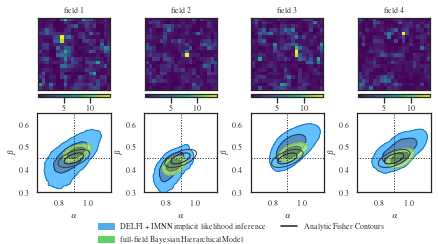

In [352]:
# do all fields' 2D plots
fig,ax = plt.subplots(nrows=2, ncols=4, figsize=(7.058, 3.41*1.), #figsize=(25, 13.5)) #
                      gridspec_kw={'height_ratios': [1, 1], 'width_ratios':[1,1,1,1]})
latexify(3.41*2)

for i in range(num_fields):
    
    if i==0:
        im = ax[0, i].imshow(field_data[i].reshape(N,N), 
                             cmap='viridis',) 
                             #vmin=0, vmax=6, 
                             #interpolation='spline16')
    else:
        ax[0, i].imshow(field_data[i].reshape(N,N), 
                             cmap='viridis',) 
                             #vmin=0, vmax=6, 
                             #interpolation='spline16')
    
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])
    
    
    divider = make_axes_locatable(ax[0, i])
    cax = divider.append_axes('bottom', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='horizontal')
    

    
    cs = ChainConsumer()
    cs.add_chain(MAF_posts[i], parameters=params, name='DELFI + IMNN', color=corner_colors[0])
    cs.add_chain(BHM_posts[i], parameters=params, name='BHM', color=corner_colors[1])
    cs.add_covariance(θ_target, -Finv_analytic, parameters=params, name="Analytic Fisher", color=corner_colors[2])
    cs.configure(linestyles=["-", "-", "-"], linewidths=[1.0, 1.0, 1.0],
            shade=[True, True, False], shade_alpha=[0.7, 0.6, 0.], tick_font_size=8)
    cs.plotter.plot_contour(ax[1, i], r"$\alpha$", r"$\beta$")

    
    ax[1, i].axvline(θ_target[0], linestyle=':', linewidth=1)
    ax[1, i].axhline(θ_target[1], linestyle=':', linewidth=1)
    
    ax[1,i].set_xlabel(r'$\alpha$', fontsize=8)
    ax[1,i].set_ylabel(r'$\beta$', fontsize=8)
    ax[0, i].set_title('field %d'%(i+1), fontsize=8)
    
    ax[1,i].set_ylim([0.3, 0.65])
    ax[1,i].set_xlim([0.65, 1.15])
    
    line1, = ax[1,i].plot(np.ones(1)*-45, np.ones(1)*-45, linestyle='solid', color='k', label="Analytic Fisher Contours")
    
patch1 = mpatches.Patch(color=colors[0][1], label='DELFI + IMNN implicit likelihood inference')
patch2 = mpatches.Patch(color=colors[2][1], label='full-field Bayesian Hierarchical Model')
#patch3 = mpatches.Patch(color=colors[1][1], label='Full field, data assimilation')
fig.legend(handles=[patch1,patch2, line1],bbox_to_anchor=(0.77, 0.12), fontsize=8, ncol=2, frameon=False,)

    
plt.subplots_adjust(wspace=0.45, hspace=0.2, bottom=0.17)
#plt.tight_layout()

#ax1 = plt.subplot(111)

plt.savefig(outdir + 'four-LN-field-comparison', dpi=800, bbox_inches='tight')

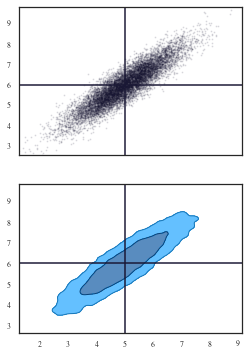

In [347]:
from scipy.stats import multivariate_normal as mv

data = mv.rvs(mean=[5, 6], cov=[[1, 0.9], [0.9, 1]], size=10000)

fig, axes = plt.subplots(nrows=2, figsize=(4, 6), sharex=True)
axes[0].scatter(data[:, 0], data[:, 1], s=1, alpha=0.1)

c = ChainConsumer()
c.add_chain(data, parameters=["a", "b"])
c.configure(linestyles=["-", "-", "-"], usetex=False, linewidths=[1.0, 1.0, 1.0],
        shade=[True, True, False], shade_alpha=[0.7, 0.6, 0.], tick_font_size=8)
c.plotter.plot_contour(axes[1], "a", "b")

for ax in axes:
    ax.axvline(5)
    ax.axhline(6)

In [269]:
F_IMNN = np.array([[ 338.58255, -355.37054],
             [-355.37054, 1134.3672 ]])
Finv_IMNN = np.linalg.inv(F_IMNN)

In [280]:
np.linalg.det(fisher_analytic)

3175571.8

In [286]:
train_losses_all[0].shape

(3000, 4)

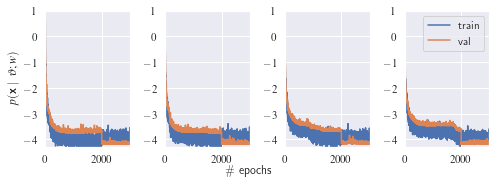

In [362]:
sns.set()
#sns.set_style('darkgrid')
fig,axs = plt.subplots(nrows=1, ncols=4, figsize=(7.058,2.5))
dataid = 2

train_losses = train_losses_all[dataid]
val_losses = val_losses_all[dataid]

for m in range(4):
    ax = axs[m]

    ax.plot(np.array(train_losses).T[m], label='train')
    ax.plot(np.array(val_losses).T[m], label='val')
    ax.set_ylim(-4.3, 1)
    
    if m == 0:
        ax.set_ylabel(r'$p(\textbf{x}\ |\ {\vartheta}; w)$')
    else:
        pass#ax.set_yticks([])
        
    
    if m == 3:
        ax.legend()
        

plt.subplots_adjust(wspace=0.1, hspace=0.17, bottom=0.17)
fig.text(0.5, 0.018, r'\# epochs', ha='center')
plt.tight_layout()

plt.savefig(outdir + 'maf-training', dpi=400)



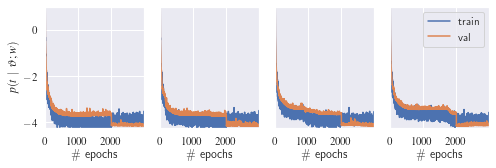

In [311]:
#import seaborn as sns
%matplotlib inline

#fig,axs = plt.subplots(nrows=1, ncols=4)

dataid = 2

train_losses = train_losses_all[dataid]
val_losses = val_losses_all[dataid]

sns.set()

plt.figure(figsize=(7.058,2.5))
plt.subplot(141)
plt.plot(np.array(train_losses).T[0], label='train')
plt.plot(np.array(val_losses).T[0], label='val')
plt.ylabel(r'$p(t\ |\ \vartheta; w)$')
plt.xlabel(r'\# epochs')
plt.ylim(-4.3, 1)

plt.subplot(142)
plt.plot(np.array(train_losses).T[1], label='train')
plt.plot(np.array(val_losses).T[1], label='val')
plt.xlabel(r'\# epochs')
#plt.ylabel(r'$p(t\ |\ \vartheta; w)$')
plt.ylim(-4.3, 1)
plt.yticks([])

plt.subplot(143)
plt.plot(np.array(train_losses).T[2], label='train')
plt.plot(np.array(val_losses).T[2], label='val')
plt.xlabel(r'\# epochs')
#plt.ylabel(r'$p(t\ |\ \vartheta; w)$')
plt.ylim(-4.3, 1)
plt.yticks([])
#plt.legend()

plt.subplot(144)
plt.plot(np.array(train_losses).T[3], label='train')
plt.plot(np.array(val_losses).T[3], label='val')
plt.xlabel(r'\# epochs')
#plt.ylabel(r'$p(t\ |\ \vartheta; w)$')
plt.yticks([])
plt.ylim(-4.3, 1)
plt.legend()

plt.subplots_adjust(wspace=0.1, hspace=0.17, bottom=0.17)

#plt.text(0.5, 0.04, r'\# epochs')

plt.tight_layout()

plt.savefig(outdir + 'maf-training', dpi=400)
plt.show()

In [373]:
import cloudpickle as pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

# load results for the cosmo field analysis

In [1034]:
mylist = [1,2,3,4]
mylist.insert(2, 9)
mylist

[1, 2, 9, 3, 4]

In [1046]:
DELFIs = [load_obj('/Users/lucas/Datasets/imnn-ln-delfi/final_cosmo_analysis/delfi_cosmo_field_%d'%(i+1))
         for i in [0,1,3]]

third_delfi = load_obj('/Users/lucas/Datasets/imnn-ln-delfi/cosmo_analysis/run_3/delfi_cosmo_field_3')

In [1047]:
DELFIs.insert(2, third_delfi)

In [1039]:
DELFIs = [load_obj('/Users/lucas/Datasets/imnn-ln-delfi/cosmo_analysis/run_3/delfi_cosmo_field_%d'%(i+1))
         for i in range(4)]

In [1048]:
cosmo_estimates = [[0.2885032, 0.7778493], [0.3440842, 0.7171489],
[0.27968222, 0.7649215 ], [0.29220793, 0.7358161 ]]

for i,d in enumerate(DELFIs):
    d['F_IMNN'] = np.array([[2991.7769, 1740.3038],[1740.304 , 1120.6669]])
    d['estimates'] = cosmo_estimates[i]
    d['θ_target'] = np.array([0.2589, 0.8159])
    d['θ_fid_new'] = np.array([0.142019, 0.80442715])
    
pst_dir = '/Users/lucas/Datasets/imnn-ln-delfi/final_cosmo_analysis/'
ABC_posts = [np.load(pst_dir + 'ABC_accepted_field_%d.npy'%(i+1)) for i in range(4)]
ABC_dists = [np.load(pst_dir + 'ABC_distances_field_%d.npy'%(i+1)) for i in range(4)]

In [1049]:
delfi['super_post'].shape

(200000, 2)

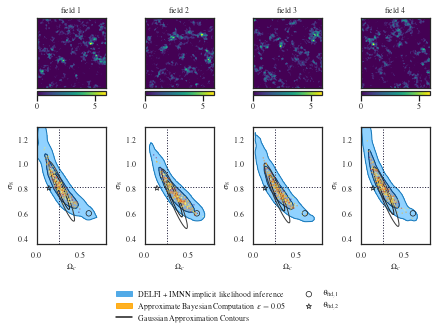

In [1057]:
# do all fields' 2D plots
# fig,ax = plt.subplots(nrows=2, ncols=4, figsize=(2*7.058, 3.41*2.), #figsize=(25, 13.5)) #
#                       gridspec_kw={'height_ratios': [1, 1], 'width_ratios':[1,1,1,1]})


fig,ax = plt.subplots(nrows=2, ncols=4, figsize=(7.058, 3.41*1.5)) #figsize=(25, 13.5)) #
                      #gridspec_kw={'height_ratios': [1, 1], 'width_ratios':[1,1,1,1]})
#latexify(3.41*2)

for i,delfi in enumerate(DELFIs):
    
    if i==0:
        im = ax[0, i].imshow(delfi['target_data'].reshape(128,128), 
                             cmap='viridis', 
                             vmin=0, vmax=6, 
                             interpolation='spline16')
    else:
        ax[0, i].imshow(delfi['target_data'].reshape(128,128), 
                             cmap='viridis',
                             vmin=0, vmax=6, 
                             interpolation='spline16')
    
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])
    
    
    divider = make_axes_locatable(ax[0, i])
    cax = divider.append_axes('bottom', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='horizontal')
    

    
    cs = ChainConsumer()
    cs.add_chain(delfi['super_post'][500::90], parameters=params, name='DELFI + IMNN')
    # add GA
    cs.add_covariance(delfi['estimates'], np.linalg.inv(delfi['F_IMNN']), 
                      parameters=params, name="GA Estimate", color='k')
    cs.configure(smooth=1.5, linestyles=["-", "-"], linewidths=[1.0, 1.0],
            shade=[True, False], shade_alpha=[0.5, 0.0], tick_font_size=8)
    cs.plotter.plot_contour(ax[1, i], r"$\Omega_c$", r"$\sigma_8$")
    
    abc_handle = ax[1,i].scatter(ABC_posts[i][:, 0], ABC_posts[i][:, 1], s=8, alpha=0.6,
                c=np.log(ABC_dists[i]), cmap='inferno', 
                    edgecolors=None, linewidths=0, marker='.', zorder=10, label="ABC Estimate")
    

    
    ax[1, i].axvline(delfi['θ_target'][0], linestyle=':', linewidth=1)
    ax[1, i].axhline(delfi['θ_target'][1], linestyle=':', linewidth=1)
    
    point1 = ax[1, i].scatter(0.6, 0.6, marker='o', s=30, alpha=1., label=r'$\theta_{\rm fid,1}$',
                             facecolors='none', edgecolors='k', linewidth=0.7)
    
    point2 = ax[1, i].scatter(delfi['θ_fid_new'][0], delfi['θ_fid_new'][1], 
                              marker='*', s=30, label=r'$\theta_{\rm fid,2}$',
                             facecolors='none', edgecolors='k', linewidth=0.7)
    
    ax[1,i].set_xlabel(r'$\Omega_c$', fontsize=8)
    #if i == 0:
    ax[1,i].set_ylabel(r'$\sigma_8$', fontsize=8)
        
        
    ax[0, i].set_title('field %d'%(i+1), fontsize=8)
    
    ax[1,i].set_ylim([0.35, 1.3])
    ax[1,i].set_xlim([0.0, 0.8])
    
    line2, = ax[1,i].plot(np.ones(1)*-45, np.ones(1)*-45, linestyle='solid', color='k', label="Gaussian Approximation Contours")
    
    
patch1 = mpatches.Patch(color=colors[0][1], label='DELFI + IMNN implicit likelihood inference')
patch2 = mpatches.Patch(color='orange', label=r'Approximate Bayesian Computation $\varepsilon = 0.05$', alpha=0.86)
fig.legend(handles=[patch1, patch2, line2, point1,point2],bbox_to_anchor=(0.68, 0.12), fontsize=8, ncol=2, frameon=False,)

    
plt.subplots_adjust(wspace=0.55, hspace=0.1, bottom=0.21)


plt.savefig(outdir + 'new-four-cosmo-field-comparison', dpi=1200, bbox_inches='tight', rasterized=True)

In [402]:
len(delfi['super_post'])

200000

In [390]:
cosmo_estimates[0]

[0.2885032, 0.7778493]

# make animation

In [521]:
dr = '/Users/lucas/Datasets/imnn-ln-delfi/cosmo_analysis/animation/posts/'
posts_dat_1 = [
    np.concatenate(
        np.load(dr + 'delfi_1_posterior_iter_%d.npy'%(i)),
        axis=0) for i in range(8)]

posts_dat_2 = [
    np.concatenate(
        np.load(dr + 'delfi_2_posterior_iter_%d.npy'%(i)),
        axis=0) for i in range(8)]

In [605]:
display_posts = [
        np.load(dr + 'delfi_1_posterior_iter_%d.npy'%(i)) for i in range(8)]



Text(0.35, 0.6, '\\# simulations needed: 500')

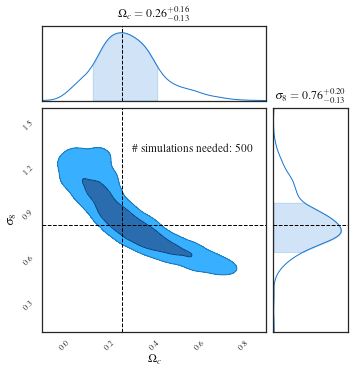

In [593]:
field = 0
itr = 0
_posts = [posts_dat_1, posts_dat_2]

COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR


params = [r"$\Omega_c$", r"$\sigma_8$"]
corner_colors = [None, None, 'k']

Finv_analytic = (-np.linalg.inv(fisher_analytic))

dataid = 3

c = ChainConsumer()
# c.configure(color_params="$z$")
c.add_chain(_posts[field][itr][::65], parameters=params, name='DELFI + IMNN', color=corner_colors[0])
#c.add_chain(BHM_posts[dataid], parameters=params, name='BHM', color=corner_colors[1])
#c.add_covariance(θ_target, -Finv_analytic, parameters=params, name="Analytic Fisher", color=corner_colors[2])
c.configure(linestyles=["-"], linewidths=[1.0],
            shade=[True,], shade_alpha=[0.9],
            tick_font_size=8,
           legend_kwargs={"loc": "upper left", "fontsize": 8},
            legend_color_text=False, legend_location=(0, 0))

fig = c.plotter.plot(figsize="column", truth=delfi['θ_target'], extents={r"$\Omega_c$": (-0.1,0.9),
                                                                         r"$\sigma_8$": (0.1,1.6)})

fig.text(0.35, 0.6, r'\# simulations needed: %d'%((1)*500), fontsize=11.5)

In [607]:
len(display_posts[0])

2

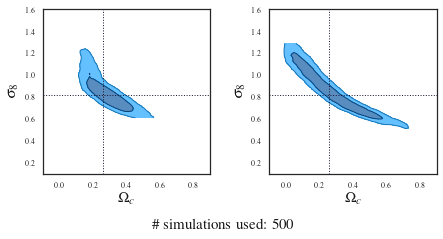

In [947]:
# plot two delfi models over time
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(7.058, 3.41*1.)) #figsize=(25, 13.5)) #
                      #gridspec_kw={'height_ratios': [1, 1], 'width_ratios':[1,1,1,1]})

post_0 = display_posts[0]
    
for i,pst in enumerate(post_0):
    
    
    cs = ChainConsumer()
    cs.add_chain(pst[::20], parameters=params, name='DELFI + IMNN')
    # add GA
    
    cs.configure(smooth=1.0, linestyles=["-"], linewidths=[1.0],
            shade=[True], shade_alpha=[0.7], tick_font_size=8)
    cs.plotter.plot_contour(ax[i], r"$\Omega_c$", r"$\sigma_8$")
    
    

    
    ax[i].axvline(delfi['θ_target'][0], linestyle=':', linewidth=1)
    ax[i].axhline(delfi['θ_target'][1], linestyle=':', linewidth=1)
    
    
    ax[i].set_xlabel(r'$\Omega_c$', fontsize=15)
    #if i == 0:
    ax[i].set_ylabel(r'$\sigma_8$', fontsize=15)
    
    ax[i].set_xlim(-0.1, 0.9)
    ax[i].set_ylim(0.1, 1.6)
    
plt.subplots_adjust(wspace=0.35, hspace=0.20, bottom=0.21)
plt.text(-0.8, -0.4, r"\# simulations used: %d"%((0+1)*500), fontsize=15)

plt.show()

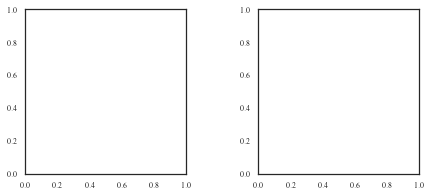

In [984]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(7.058, 3.41*1.))
plt.subplots_adjust(wspace=0.45, hspace=0.20, bottom=0.21)
# fig.patch.set_alpha(0.)

prunes = [1, 35, 45, 45, 45, 65, 65, 65]

params = [r"$\Omega_c$", r"$\sigma_8$"]


COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# initialization function: plot the background of each frame
def init():
    #line.set_data([], [])
#     fig.patch.set_alpha(0.0)
#     for ax in fig.axes:
#         ax.patch.set_alpha(0.0)
    return (fig,)

def animate_two(t):
    
    
    post = display_posts[t]
    
    for i,pst in enumerate(post):
        
        ax[i].clear()
        
        #ax[i].patch.set_alpha(0.0)

        cs = ChainConsumer()
        cs.add_chain(pst[::prunes[t]], parameters=params, name='DELFI + IMNN')

        cs.configure(smooth=1.0, linestyles=["-"], linewidths=[1.0],
                shade=[True], shade_alpha=[0.7], tick_font_size=8)
        cs.plotter.plot_contour(ax[i], r"$\Omega_c$", r"$\sigma_8$")




        ax[i].axvline(delfi['θ_target'][0], linestyle=':', linewidth=1)
        ax[i].axhline(delfi['θ_target'][1], linestyle=':', linewidth=1)


        ax[i].set_xlabel(r'$\Omega_c$', fontsize=15, color=COLOR)
        #if i == 0:
        ax[i].set_ylabel(r'$\sigma_8$', fontsize=15, color=COLOR)

        ax[i].set_xlim(-0.1, 0.9)
        ax[i].set_ylim(0.1, 1.6)
        ax[i].set_title('MAF %d'%(i+1), fontsize=15, color=COLOR)
        
        #ax[i].patch.set_alpha(0.0)

#     fig.patch.set_alpha(0.0)
#     for a in fig.axes:
#         a.patch.set_alpha(0.0)
    
    ax[0].text(0.5, -0.3, r"\# simulations used: %d"%((t+1)*500), fontsize=15)
    
    #
    
    #plt.savefig('/Users/lucas/Datasets/imnn-ln-delfi/cosmo_analysis/animation/pane_%d'%(t), transparent=True)
    
    #plt.cla()
    return (fig,)

In [985]:
animator = animation.FuncAnimation(fig, animate_two, init_func=init, 
                                   frames=8, interval=1000, blit=False, repeat_delay=19000)


In [986]:
animator

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:figure size (inches) has been adjusted from 7.058 x 3.41 to 7.055555555555555 x 3.388888888888889
INFO:matplotlib.animation:MovieWriter.run: running command: ['/usr/local/bin/ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '508x244', '-pix_fmt', 'rgba', '-r', '1.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/var/folders/wq/_6nr2r9x14jgbvlbkxn_pyym0000gn/T/tmpxf5ok3cx/temp.m4v']


In [987]:
# Set up formatting for the movie files 'imagemagick'
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

animator.save('/Users/lucas/Documents/IAP/imnn-fields/delfi-whitefont.gif', 
              writer='imagemagick', 
              fps=2, 
              dpi=400, 
              codec="png"), #bitrate=-1,
              #extra_args={'transparent': True, 'facecolor': 'none'},
              #savefig_kwargs={'transparent': True, 'facecolor': 'none'})

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
INFO:matplotlib.animation:MovieWriter.run: running command: ['convert', '-size', '2822x1355', '-depth', '8', '-delay', '50.0', '-loop', '0', 'rgba:-', '/Users/lucas/Documents/IAP/imnn-fields/delfi-whitefont.gif']


(None,)

In [885]:
ax[0].xaxis

Traceback (most recent call last):
  File "/Users/lucas/anaconda3/envs/pyimnn/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/lucas/anaconda3/envs/pyimnn/lib/python3.7/site-packages/matplotlib/animation.py", line 953, in _start
    self._init_draw()
  File "/Users/lucas/anaconda3/envs/pyimnn/lib/python3.7/site-packages/matplotlib/animation.py", line 1741, in _init_draw
    a.set_animated(self._blit)
AttributeError: 'numpy.ndarray' object has no attribute 'set_animated'


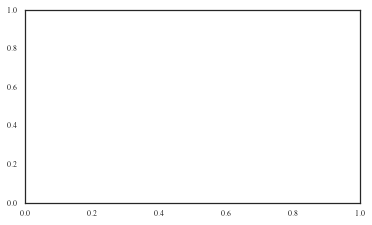

In [684]:
%matplotlib inline
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=8, interval=250, blit=True, repeat_delay=1000)

In [594]:
from matplotlib import animation, rc
from IPython.display import HTML, Image
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

rc('animation', html='html5')

In [595]:
# initialization function: plot the background of each frame
def init():
    return (fig,)

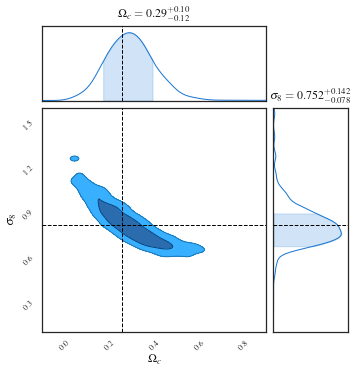

<Figure size 432x288 with 0 Axes>

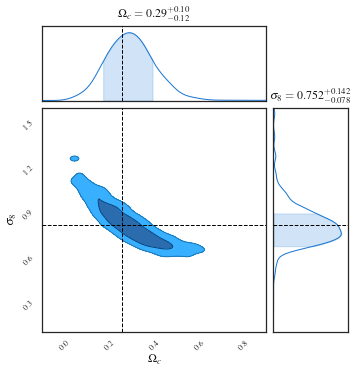

In [821]:
# initialize
fig = plt.figure()

field = 0
itr = 7
_posts = [posts_dat_1, posts_dat_2]

COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR


params = [r"$\Omega_c$", r"$\sigma_8$"]
corner_colors = [None, None, 'k']

Finv_analytic = (-np.linalg.inv(fisher_analytic))

dataid = 3

c = ChainConsumer()
# c.configure(color_params="$z$")
c.add_chain(_posts[field][itr][::70], parameters=params, name='DELFI + IMNN', color=corner_colors[0])
#c.add_chain(BHM_posts[dataid], parameters=params, name='BHM', color=corner_colors[1])
#c.add_covariance(θ_target, -Finv_analytic, parameters=params, name="Analytic Fisher", color=corner_colors[2])
c.configure(linestyles=["-"], linewidths=[1.0],
            shade=[True,], shade_alpha=[0.9],
            tick_font_size=8,
           legend_kwargs={"loc": "upper left", "fontsize": 8},
            legend_color_text=False, legend_location=(0, 0))

c.plotter.plot(figsize="column", truth=delfi['θ_target'], extents={r"$\Omega_c$": (-0.1,0.9),
                                                                         r"$\sigma_8$": (0.1,1.6)})

#plt.text(0.35, 0.6, r'\# simulations needed: %d'%((i+1)*500), fontsize=11.5)


In [791]:
fig

<Figure size 432x288 with 0 Axes>

In [801]:
# data
#fig = plt.figure()
def animate(i):
    
    for a,ax in fig.axes:
        ax.clear()
    
    field = 0
    itr = i
    _posts = [posts_dat_1, posts_dat_2]

    COLOR = 'k'
    plt.rcParams['text.color'] = COLOR
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR


    params = [r"$\Omega_c$", r"$\sigma_8$"]
    corner_colors = [None, None, 'k']

    Finv_analytic = (-np.linalg.inv(fisher_analytic))

    dataid = 3

    c = ChainConsumer()
    # c.configure(color_params="$z$")
    c.add_chain(_posts[field][itr][::65], parameters=params, name='DELFI + IMNN', color=corner_colors[0])
    #c.add_chain(BHM_posts[dataid], parameters=params, name='BHM', color=corner_colors[1])
    #c.add_covariance(θ_target, -Finv_analytic, parameters=params, name="Analytic Fisher", color=corner_colors[2])
    c.configure(linestyles=["-"], linewidths=[1.0],
                shade=[True,], shade_alpha=[0.9],
                tick_font_size=8,
               legend_kwargs={"loc": "upper left", "fontsize": 8},
                legend_color_text=False, legend_location=(0, 0))

    c.plotter.plot(figsize="column", truth=delfi['θ_target'], extents={r"$\Omega_c$": (-0.1,0.9),
                                                                             r"$\sigma_8$": (0.1,1.6)})

    plt.text(0.35, 0.6, r'\# simulations needed: %d'%((i+1)*500), fontsize=11.5)
    return (fig,)

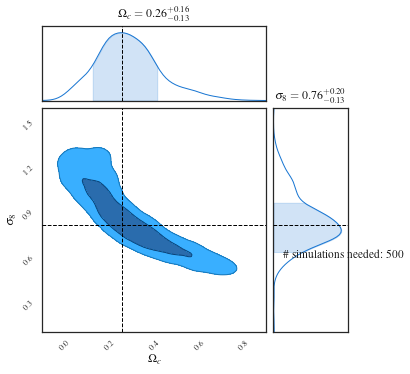

In [802]:
%matplotlib inline
anim = animation.FuncAnimation(fig, animate,
                               frames=8, interval=250, blit=True, repeat_delay=1000)

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter.run: running command: ['/usr/local/bin/ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '4.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/var/folders/wq/_6nr2r9x14jgbvlbkxn_pyym0000gn/T/tmp_jhmfga5/temp.m4v']


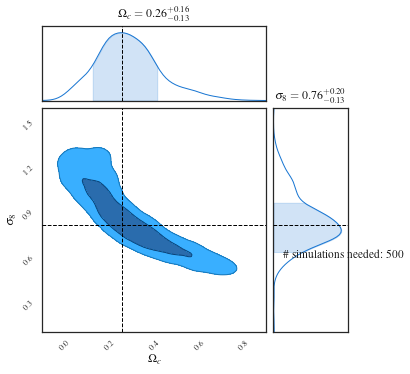

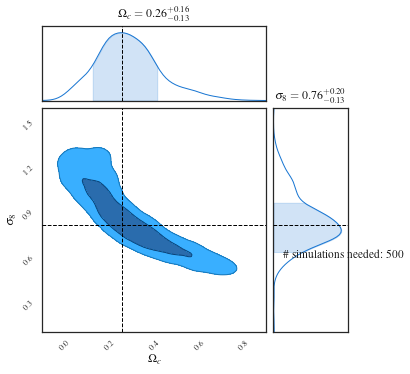

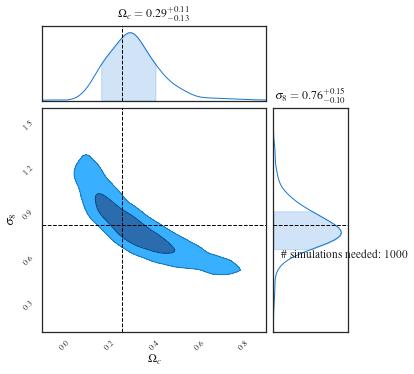

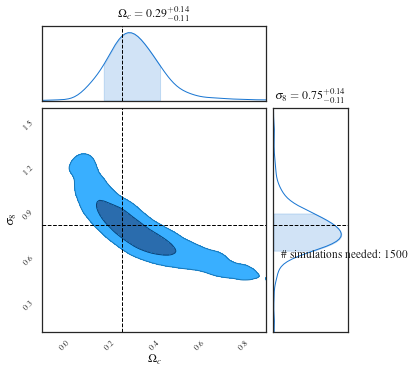

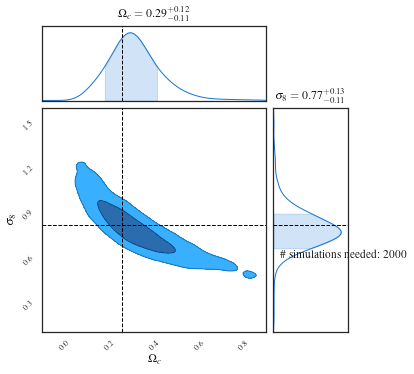

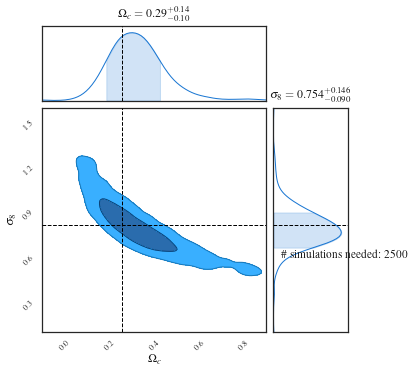

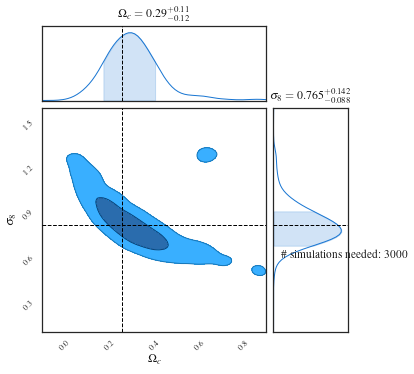

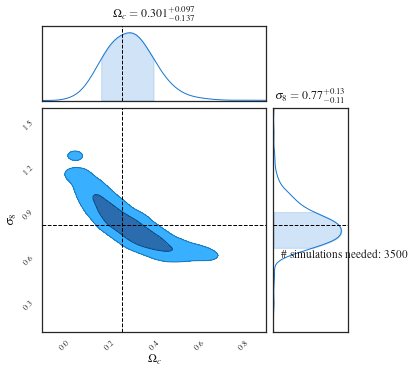

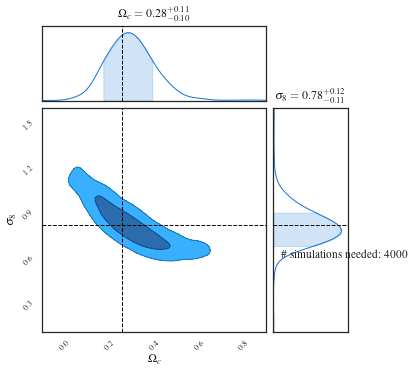

In [803]:
anim

In [ ]:
# data 
xval_c1 = pca3[20].T #np.squeeze(y_preds[1][2]).transpose()
yval_c1 = np.squeeze(cosmo[20]).transpose() 
y_c1_pred = np.squeeze(nn_preds[20]).transpose()

# animation function. This is called sequentially
def animate(i):
    pick = i
    # cosmo calculation ----
    nu = nu_arr[pick]
#     from astropy.cosmology import FlatLambdaCDM
#     CL = FlatLambdaCDM(H0=67, Om0=0.315, Ob0=0.049, Tcmb0=2.725)
#     nu_21 = 1420.4
#     z = (nu_21 / nu) - 1
#     d_A = CL.angular_diameter_distance(z=z) 
#     res_rad = hp.pixelfunc.nside2resol(256, arcmin=True) * 0.000290888  # to radians
#     res_mpc = res_rad * d_A
    res_mpc = res_in_mpc[i]

    # ----
    #plt.style.use('dark_background')

    fig.suptitle(r'$\nu = $%03d'%(nu) + r' $\rm MHz$')
    
    # set data and change for changing comoving redshift
    ax1.set(xlim=(0, 64*res_mpc), ylim=(0, 64*res_mpc))
    im1.set_data(yval_c1[i])
    
    ax2.set(xlim=(0, 64*res_mpc), ylim=(0, 64*res_mpc))
    im2.set_data(xval_c1[i])
    
    ax3.set(xlim=(0, 64*res_mpc), ylim=(0, 64*res_mpc))
    im3.set_data(y_c1_pred[i])
    
    return (im1, im2, im3)